# HR Analytics Project- Understanding the Attrition in HR
### Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
#### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
#### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
#### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


Dataset Link-
•	https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics



In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
#loading the dataset
data = pd.read_csv('HR.csv')

In [4]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
print(data.info())  # Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data.shape

(1470, 35)

In [8]:
# Checking each column name present in the dataset
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# checking the data types of each columns
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
#  check  the duplicate
duplicate = data[data.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate
print("No duplicate rows")

Duplicate Rows :
No duplicate rows


In [12]:
#Describing the dataset
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Observations:
There are no null values present in the dataset
The dataset contains 1470 rows and 35 columns
No duplicate are present in the dataset
Over18 has only one value, yes, so I can drop it
StandardHours also has one value is 80 , so I can drop it

### EDA and Visualization

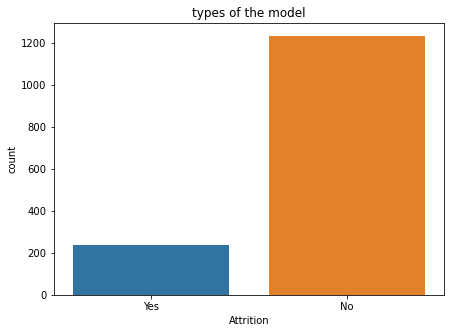

In [13]:
plt.figure(figsize=(7,5))
sns.countplot(x='Attrition' , data=data)
plt.title('types of the model')
plt.show()

#### From the graph we can more than 80% stayed in the company only few were left

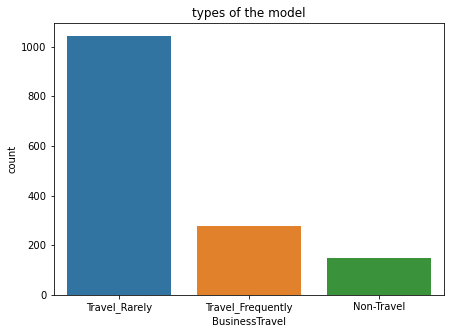

In [14]:
plt.figure(figsize=(7,5))
sns.countplot(x='BusinessTravel' , data=data)
plt.title('types of the model')
plt.show()

# from the graph most of the people travel rarely.

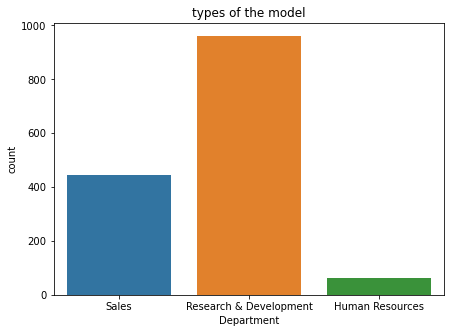

In [15]:
plt.figure(figsize=(7,5))
sns.countplot(x='Department' , data=data)
plt.title('types of the model')
plt.show()

#### From the graph there are 3 departments and most people are from Research and development department.


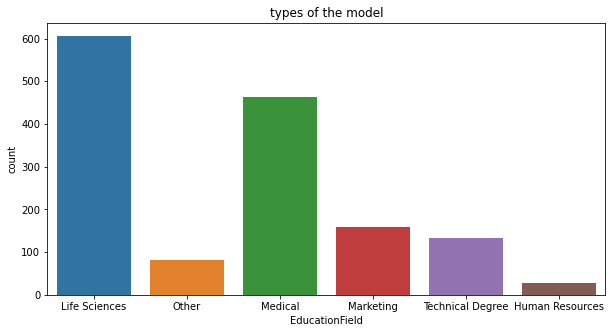

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='EducationField' , data=data)
plt.title('types of the model')
plt.show()

#### From the Graph the education of the most people is Life science followed by Medical followed by Marketing and last Techinical Degree.

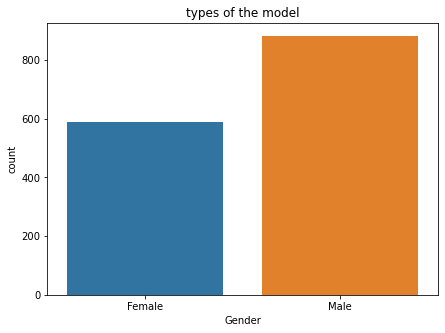

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(x='Gender' , data=data)
plt.title('types of the model')
plt.show()

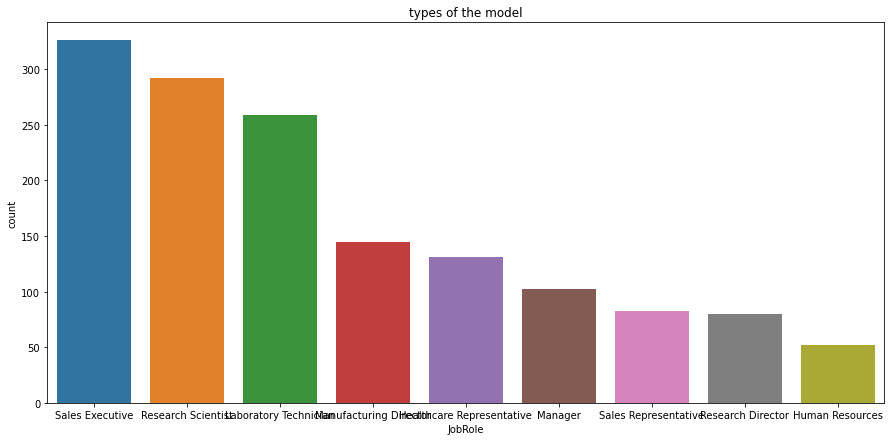

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(x='JobRole' , data=data)
plt.title('types of the model')
plt.show()

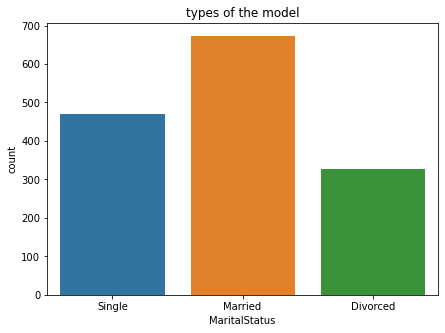

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x='MaritalStatus' , data=data)
plt.title('types of the model')
plt.show()

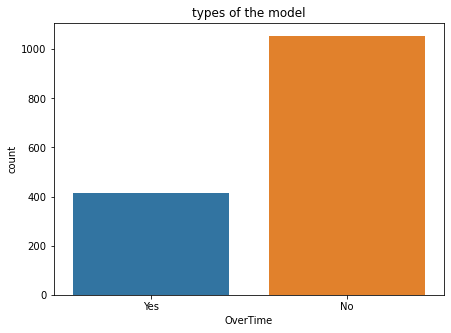

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x='OverTime' , data=data)
plt.title('types of the model')
plt.show()

###  From the graph we can say that some people do overtime as well.
### Using Crosstab to understand the dataset

In [21]:
pd.crosstab(data.Attrition, data.JobRole).apply(lambda r: r/r.sum()*100,axis=1)

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,9.894566,3.244120,15.977291,7.866991,10.948905,6.326034,19.870235,21.816707,4.055150
Yes,3.797468,5.063291,26.160338,2.109705,4.219409,0.843882,19.831224,24.050633,13.924051


In [22]:
# Reassign target
data['Attrition'].replace(['No','Yes'],[0,1],inplace=True)
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [23]:
def graphs(x_feature,y_label,data):
    
    print(data[[x_feature, y_label]].groupby([x_feature], as_index=False).mean().sort_values(by=y_label, ascending=False))
    print('\n')
    print(data[x_feature].value_counts())
    print( "\n")
    sns.countplot(x=x_feature,hue=y_label,data = data)
    plt.figure(figsize = (15, 5))

In [24]:
pd.crosstab(data.Attrition, data.Gender)

Gender,Female,Male
Attrition,,
0,501,732
1,87,150


   Gender  Attrition
1    Male   0.170068
0  Female   0.147959


Male      882
Female    588
Name: Gender, dtype: int64




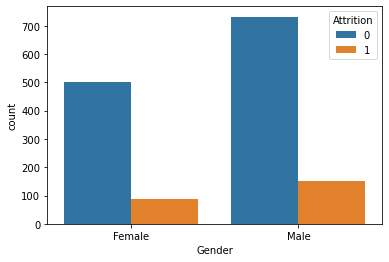

<Figure size 1080x360 with 0 Axes>

In [25]:
graphs('Gender','Attrition',data)

In [26]:
pd.crosstab(data.Attrition, data.BusinessTravel)

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
0,138,208,887
1,12,69,156


      BusinessTravel  Attrition
1  Travel_Frequently   0.249097
2      Travel_Rarely   0.149569
0         Non-Travel   0.080000


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64




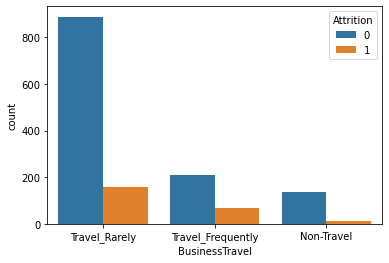

<Figure size 1080x360 with 0 Axes>

In [27]:
graphs('BusinessTravel','Attrition',data)

In [28]:
pd.crosstab(data.Attrition, data.Department)

Department,Human Resources,Research & Development,Sales
Attrition,,,
0,51,828,354
1,12,133,92


               Department  Attrition
2                   Sales   0.206278
0         Human Resources   0.190476
1  Research & Development   0.138398


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64




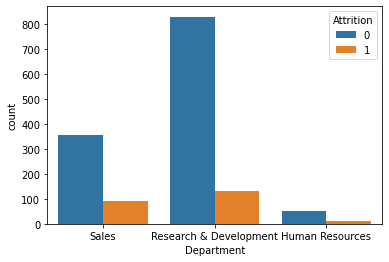

<Figure size 1080x360 with 0 Axes>

In [29]:
graphs('Department','Attrition',data)

In [30]:
pd.crosstab(data.Attrition, data.EnvironmentSatisfaction)

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
0,212,244,391,386
1,72,43,62,60


   EnvironmentSatisfaction  Attrition
0                        1   0.253521
1                        2   0.149826
2                        3   0.136865
3                        4   0.134529


3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64




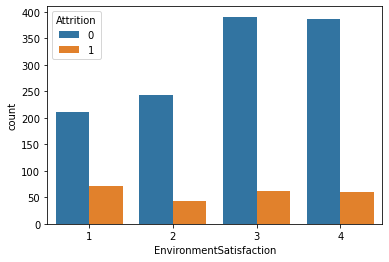

<Figure size 1080x360 with 0 Axes>

In [31]:
graphs('EnvironmentSatisfaction','Attrition',data)

In [32]:
pd.crosstab(data.Attrition, data.JobSatisfaction)

JobSatisfaction,1,2,3,4
Attrition,,,,
0,223,234,369,407
1,66,46,73,52


   JobSatisfaction  Attrition
0                1   0.228374
2                3   0.165158
1                2   0.164286
3                4   0.113290


4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64




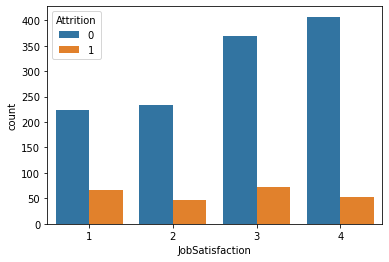

<Figure size 1080x360 with 0 Axes>

In [33]:
graphs('JobSatisfaction','Attrition',data)

In [34]:

pd.crosstab( data.NumCompaniesWorked,data.Attrition)

Attrition,0,1
NumCompaniesWorked,,
0,174,23
1,423,98
2,130,16
3,143,16
4,122,17
5,47,16
6,54,16
7,57,17
8,43,6


   NumCompaniesWorked  Attrition
5                   5   0.253968
9                   9   0.230769
7                   7   0.229730
6                   6   0.228571
1                   1   0.188100
8                   8   0.122449
4                   4   0.122302
0                   0   0.116751
2                   2   0.109589
3                   3   0.100629


1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64




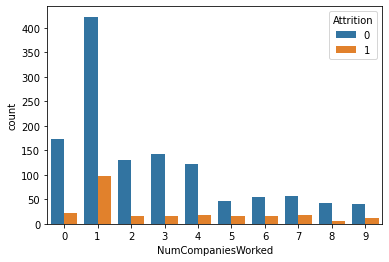

<Figure size 1080x360 with 0 Axes>

In [35]:
graphs('NumCompaniesWorked','Attrition',data)

In [36]:
pd.crosstab( data.OverTime,data.Attrition)

Attrition,0,1
OverTime,,
No,944,110
Yes,289,127


  OverTime  Attrition
1      Yes   0.305288
0       No   0.104364


No     1054
Yes     416
Name: OverTime, dtype: int64




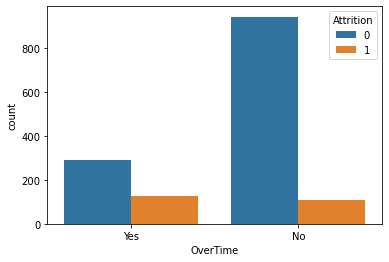

<Figure size 1080x360 with 0 Axes>

In [37]:
graphs('OverTime','Attrition',data)

In [38]:
pd.crosstab( data.PercentSalaryHike,data.Attrition)

Attrition,0,1
PercentSalaryHike,,
11,169,41
12,165,33
13,175,34
14,177,24
15,83,18
16,64,14
17,68,14
18,76,13
19,67,9


   NumCompaniesWorked  Attrition
5                   5   0.253968
9                   9   0.230769
7                   7   0.229730
6                   6   0.228571
1                   1   0.188100
8                   8   0.122449
4                   4   0.122302
0                   0   0.116751
2                   2   0.109589
3                   3   0.100629


1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64




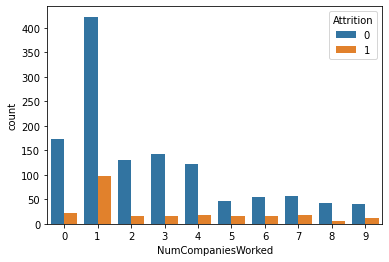

<Figure size 1080x360 with 0 Axes>

In [40]:
graphs('NumCompaniesWorked','Attrition',data)

In [42]:
pd.crosstab( data.OverTime,data.Attrition)

Attrition,0,1
OverTime,,
No,944,110
Yes,289,127


  OverTime  Attrition
1      Yes   0.305288
0       No   0.104364


No     1054
Yes     416
Name: OverTime, dtype: int64




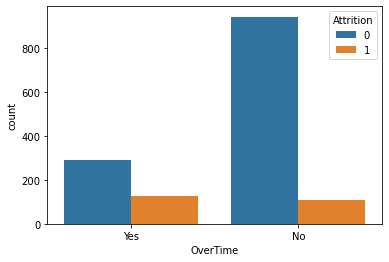

<Figure size 1080x360 with 0 Axes>

In [43]:
graphs('OverTime','Attrition',data)

In [44]:
pd.crosstab( data.PercentSalaryHike,data.Attrition)

Attrition,0,1
PercentSalaryHike,,
11,169,41
12,165,33
13,175,34
14,177,24
15,83,18
16,64,14
17,68,14
18,76,13
19,67,9


    PercentSalaryHike  Attrition
13                 24   0.285714
11                 22   0.214286
12                 23   0.214286
0                  11   0.195238
5                  16   0.179487
4                  15   0.178218
6                  17   0.170732
1                  12   0.166667
2                  13   0.162679
7                  18   0.146067
9                  20   0.127273
3                  14   0.119403
8                  19   0.118421
10                 21   0.104167
14                 25   0.055556


11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64




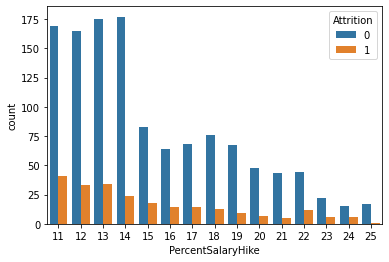

<Figure size 1080x360 with 0 Axes>

In [45]:
graphs('PercentSalaryHike','Attrition',data)

    PercentSalaryHike  Attrition
13                 24   0.285714
11                 22   0.214286
12                 23   0.214286
0                  11   0.195238
5                  16   0.179487
4                  15   0.178218
6                  17   0.170732
1                  12   0.166667
2                  13   0.162679
7                  18   0.146067
9                  20   0.127273
3                  14   0.119403
8                  19   0.118421
10                 21   0.104167
14                 25   0.055556


11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64




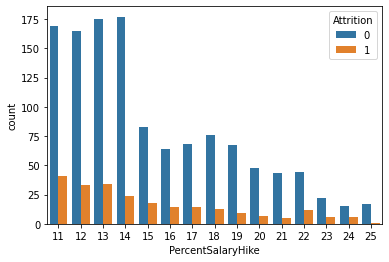

<Figure size 1080x360 with 0 Axes>

In [46]:
graphs('PercentSalaryHike','Attrition',data)

In [47]:
pd.crosstab( data.PerformanceRating,data.Attrition)

Attrition,0,1
PerformanceRating,,
3,1044,200
4,189,37


   PerformanceRating  Attrition
1                  4   0.163717
0                  3   0.160772


3    1244
4     226
Name: PerformanceRating, dtype: int64




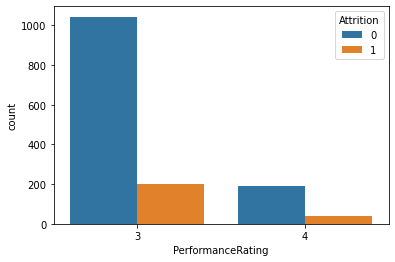

<Figure size 1080x360 with 0 Axes>

In [48]:
graphs('PerformanceRating','Attrition',data)

In [49]:
pd.crosstab( data.YearsSinceLastPromotion,data.Attrition)

Attrition,0,1
YearsSinceLastPromotion,,
0,471,110
1,308,49
2,132,27
3,43,9
4,56,5
5,43,2
6,26,6
7,60,16
8,18,0


    YearsSinceLastPromotion  Attrition
9                         9   0.235294
15                       15   0.230769
7                         7   0.210526
13                       13   0.200000
0                         0   0.189329
6                         6   0.187500
3                         3   0.173077
2                         2   0.169811
10                       10   0.166667
1                         1   0.137255
14                       14   0.111111
11                       11   0.083333
4                         4   0.081967
5                         5   0.044444
8                         8   0.000000
12                       12   0.000000


0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64




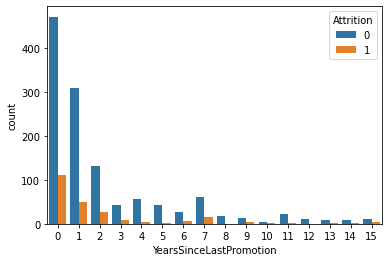

<Figure size 1080x360 with 0 Axes>

In [50]:
graphs('YearsSinceLastPromotion','Attrition',data)

In [52]:

data.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Observations from the crosstab and related graphs


17 % of people who leave the company is a man whereas 15% women , note dataset have men more than women

The sales department has a higher percentage of Attrition = 0.206278 -Marital Status, Single has a higher percentage of Attrition = 0.255319

people who work overtime have a higher percentage of Attrition = 0.305288 -An employee who had training between two and five times last year has a higher percentage of Attrition

Life Sciences Education Field has a higher percentage of Attrition the average age for an employee who has a higher percentage of Attrition is between 26 and 32

### Applying Label Encoder to categorical columns

In [53]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le=LabelEncoder()
df1=le.fit_transform(data['BusinessTravel'])
pd.Series(df1)

0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Length: 1470, dtype: int32

In [56]:
data['BusinessTravel']=df1

In [58]:
df2=le.fit_transform(data['Department'])
pd.Series(df1)
data['Department']=df2

In [59]:

df3=le.fit_transform(data['EducationField'])
pd.Series(df1)
data['EducationField']=df3

In [61]:
df4=le.fit_transform(data['Gender'])
pd.Series(df1)
data['Gender']=df4

In [62]:
df5=le.fit_transform(data['JobRole'])
pd.Series(df1)
data['JobRole']=df5

In [63]:
df6=le.fit_transform(data['MaritalStatus'])
pd.Series(df1)
data['MaritalStatus']=df6

In [64]:
df7=le.fit_transform(data['Over18'])
pd.Series(df1)
data['Over18']=df7

In [65]:
df8=le.fit_transform(data['OverTime'])
pd.Series(df1)
data['OverTime']=df8

In [67]:
#checking the datatypes again after appling the Label encoder
data.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [69]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Dropping Unwanted Columns

In [70]:
# Removing unncessary c columns
data.drop(['Over18' , 'EmployeeCount','StandardHours','EmployeeNumber'],axis=1,inplace = True)

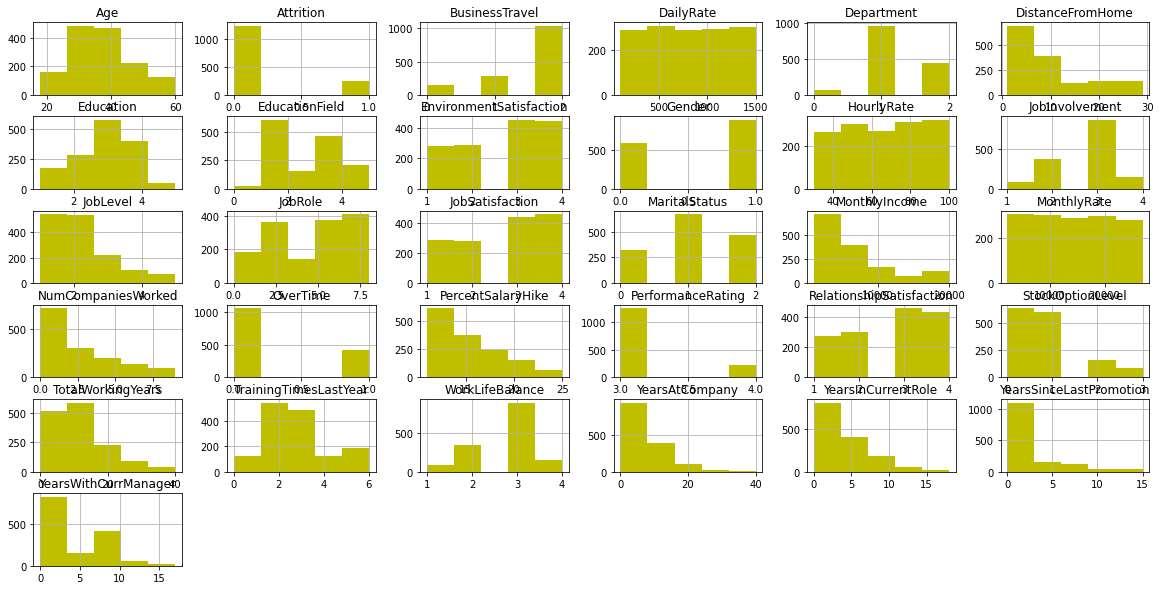

In [72]:
#Plotting Histogram plot to see how data is distributed on an interval scale.
# analyzing the data
data.hist(color='y',figsize=(20,10),bins=5)
plt.show()

From the histogram plot, we cannot see things very clearly but we can observe some left skewed data in continuous features, to get better visibility we can plot a distribution plot.

### Plotting Disrtibution plot to see how data is distributed

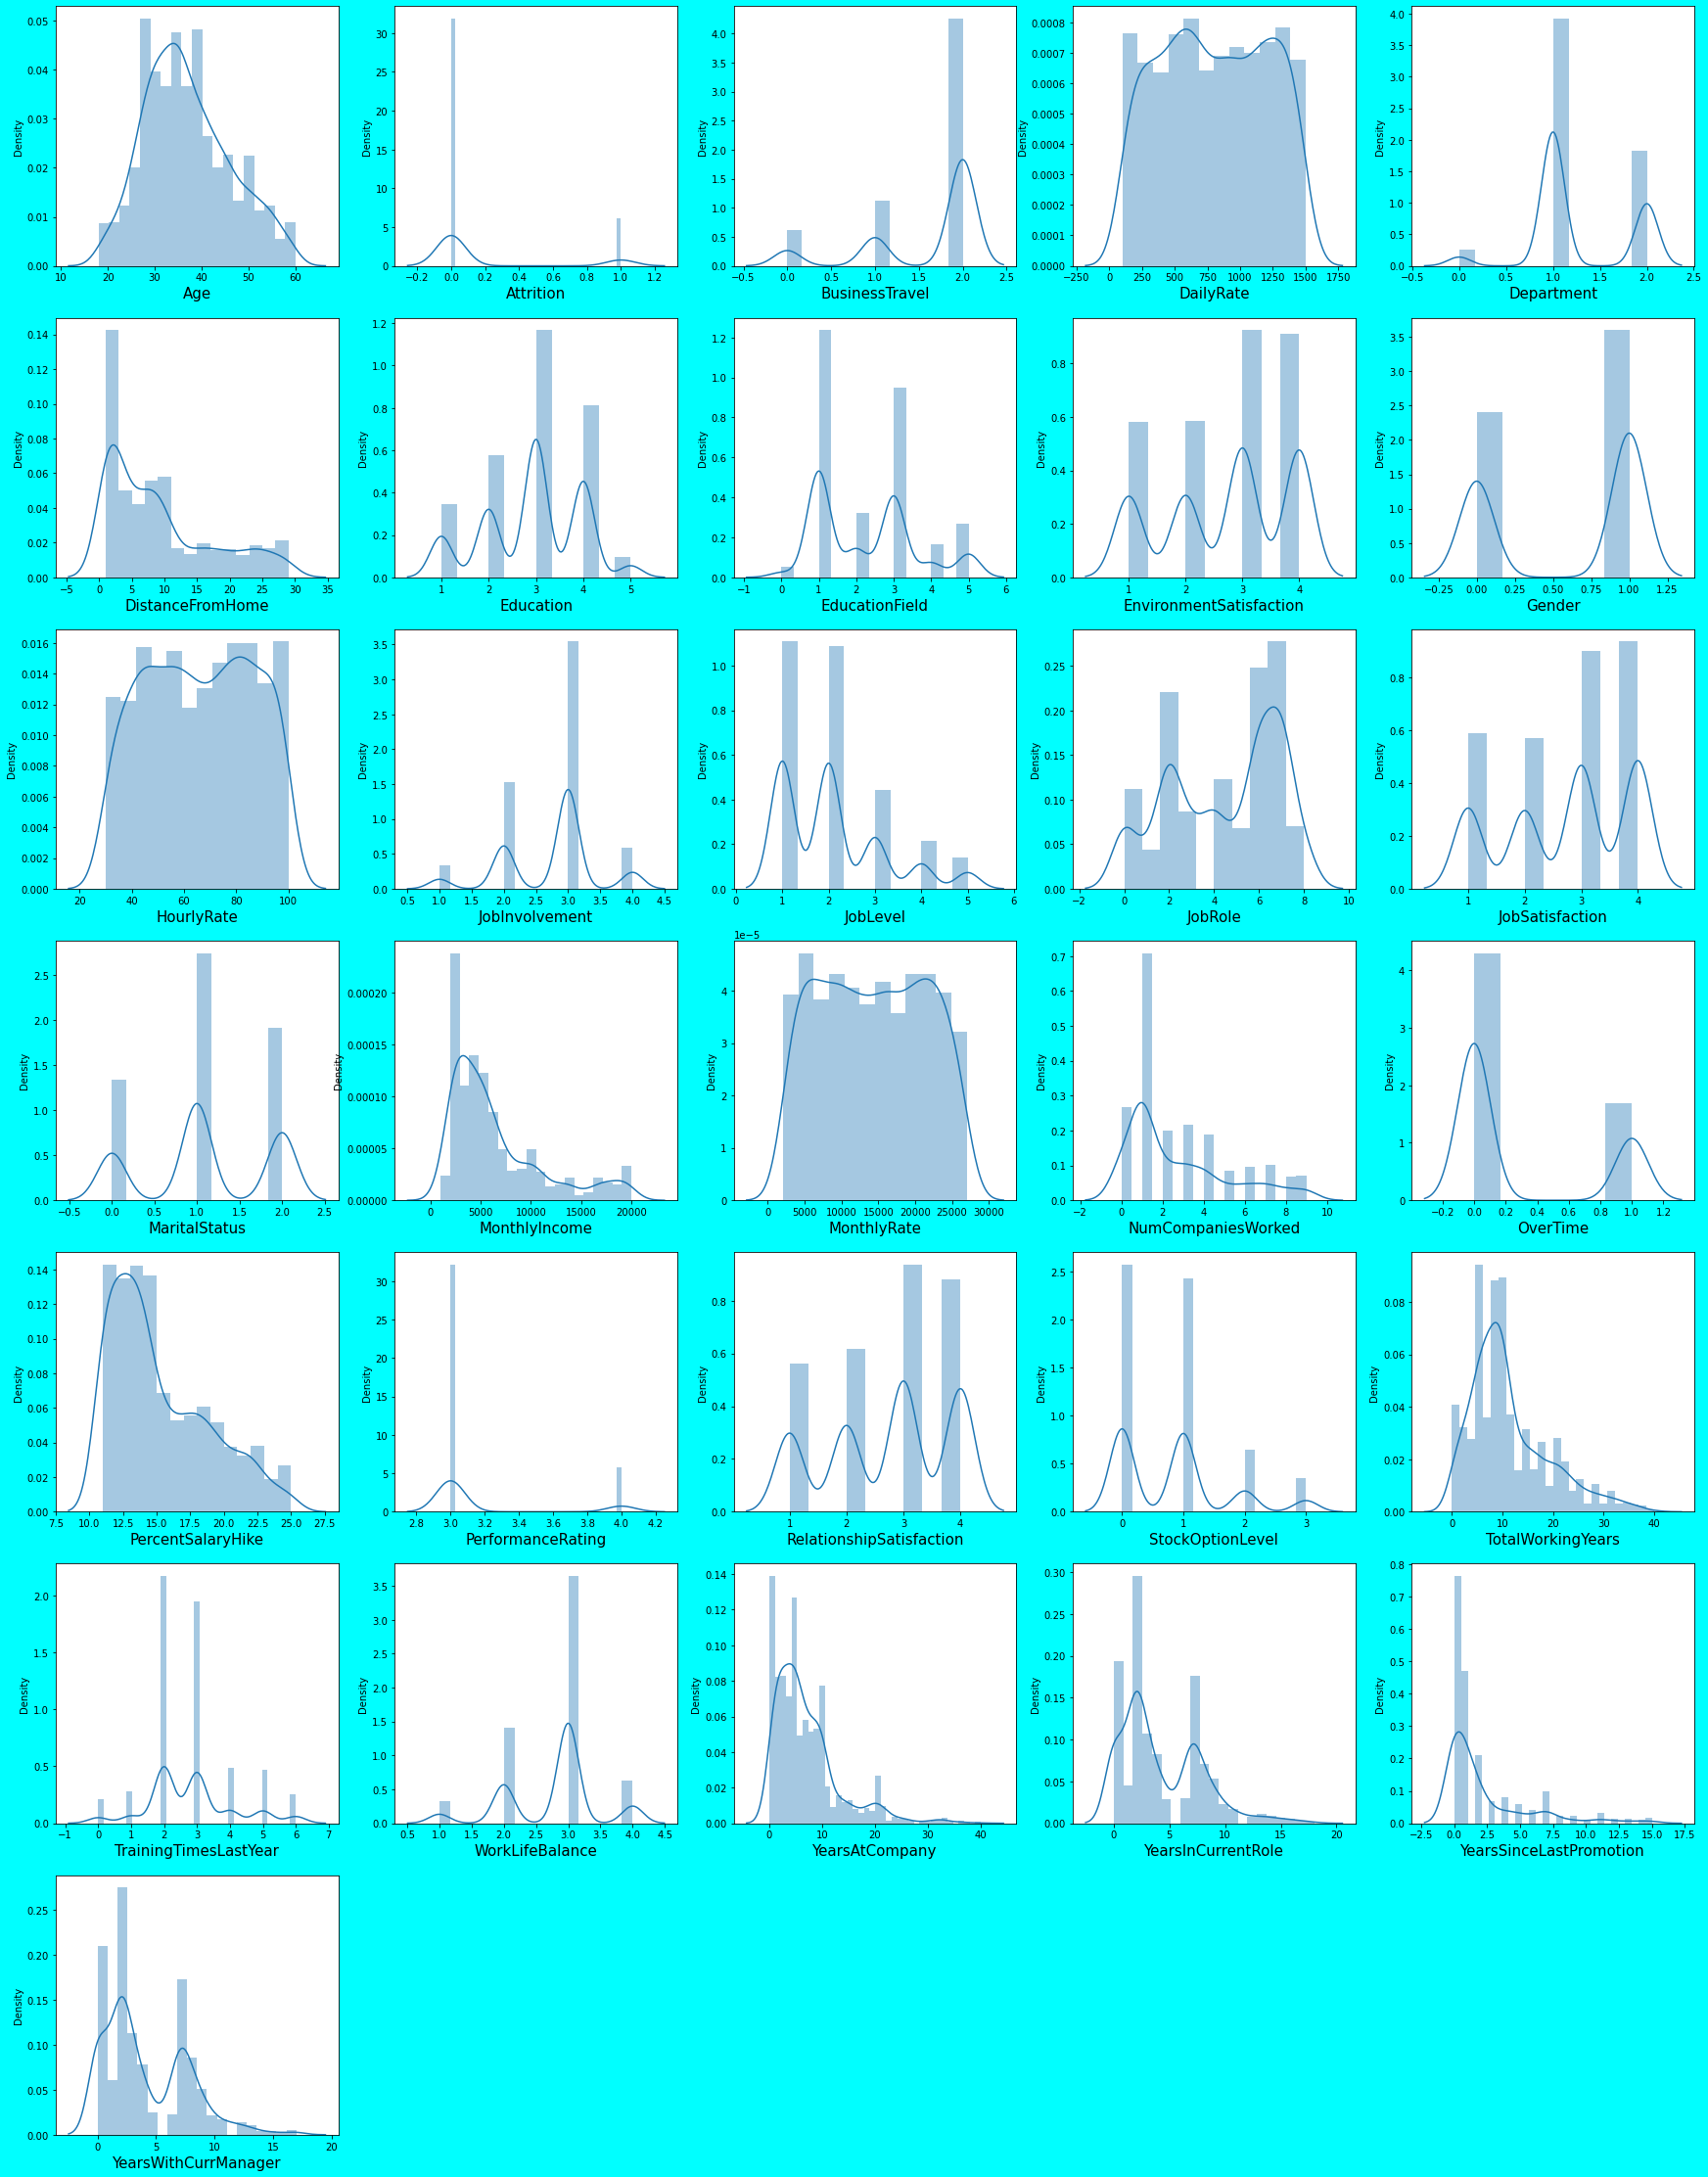

In [78]:
import warnings
warnings.filterwarnings('ignore')


# seeeing dist plot how data is scttered
plt.figure(figsize=(30,40) , facecolor = 'cyan')
plotnumber = 1

for column in data:
    if plotnumber <= 35:
        ax = plt.subplot(7,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column , fontsize = 15)
    plotnumber += 1
plt.show()

### From the Distribution Plot, we see that the data is left-skewed and has an outlier.

#### Plotting Box plot to see outliers are present are not

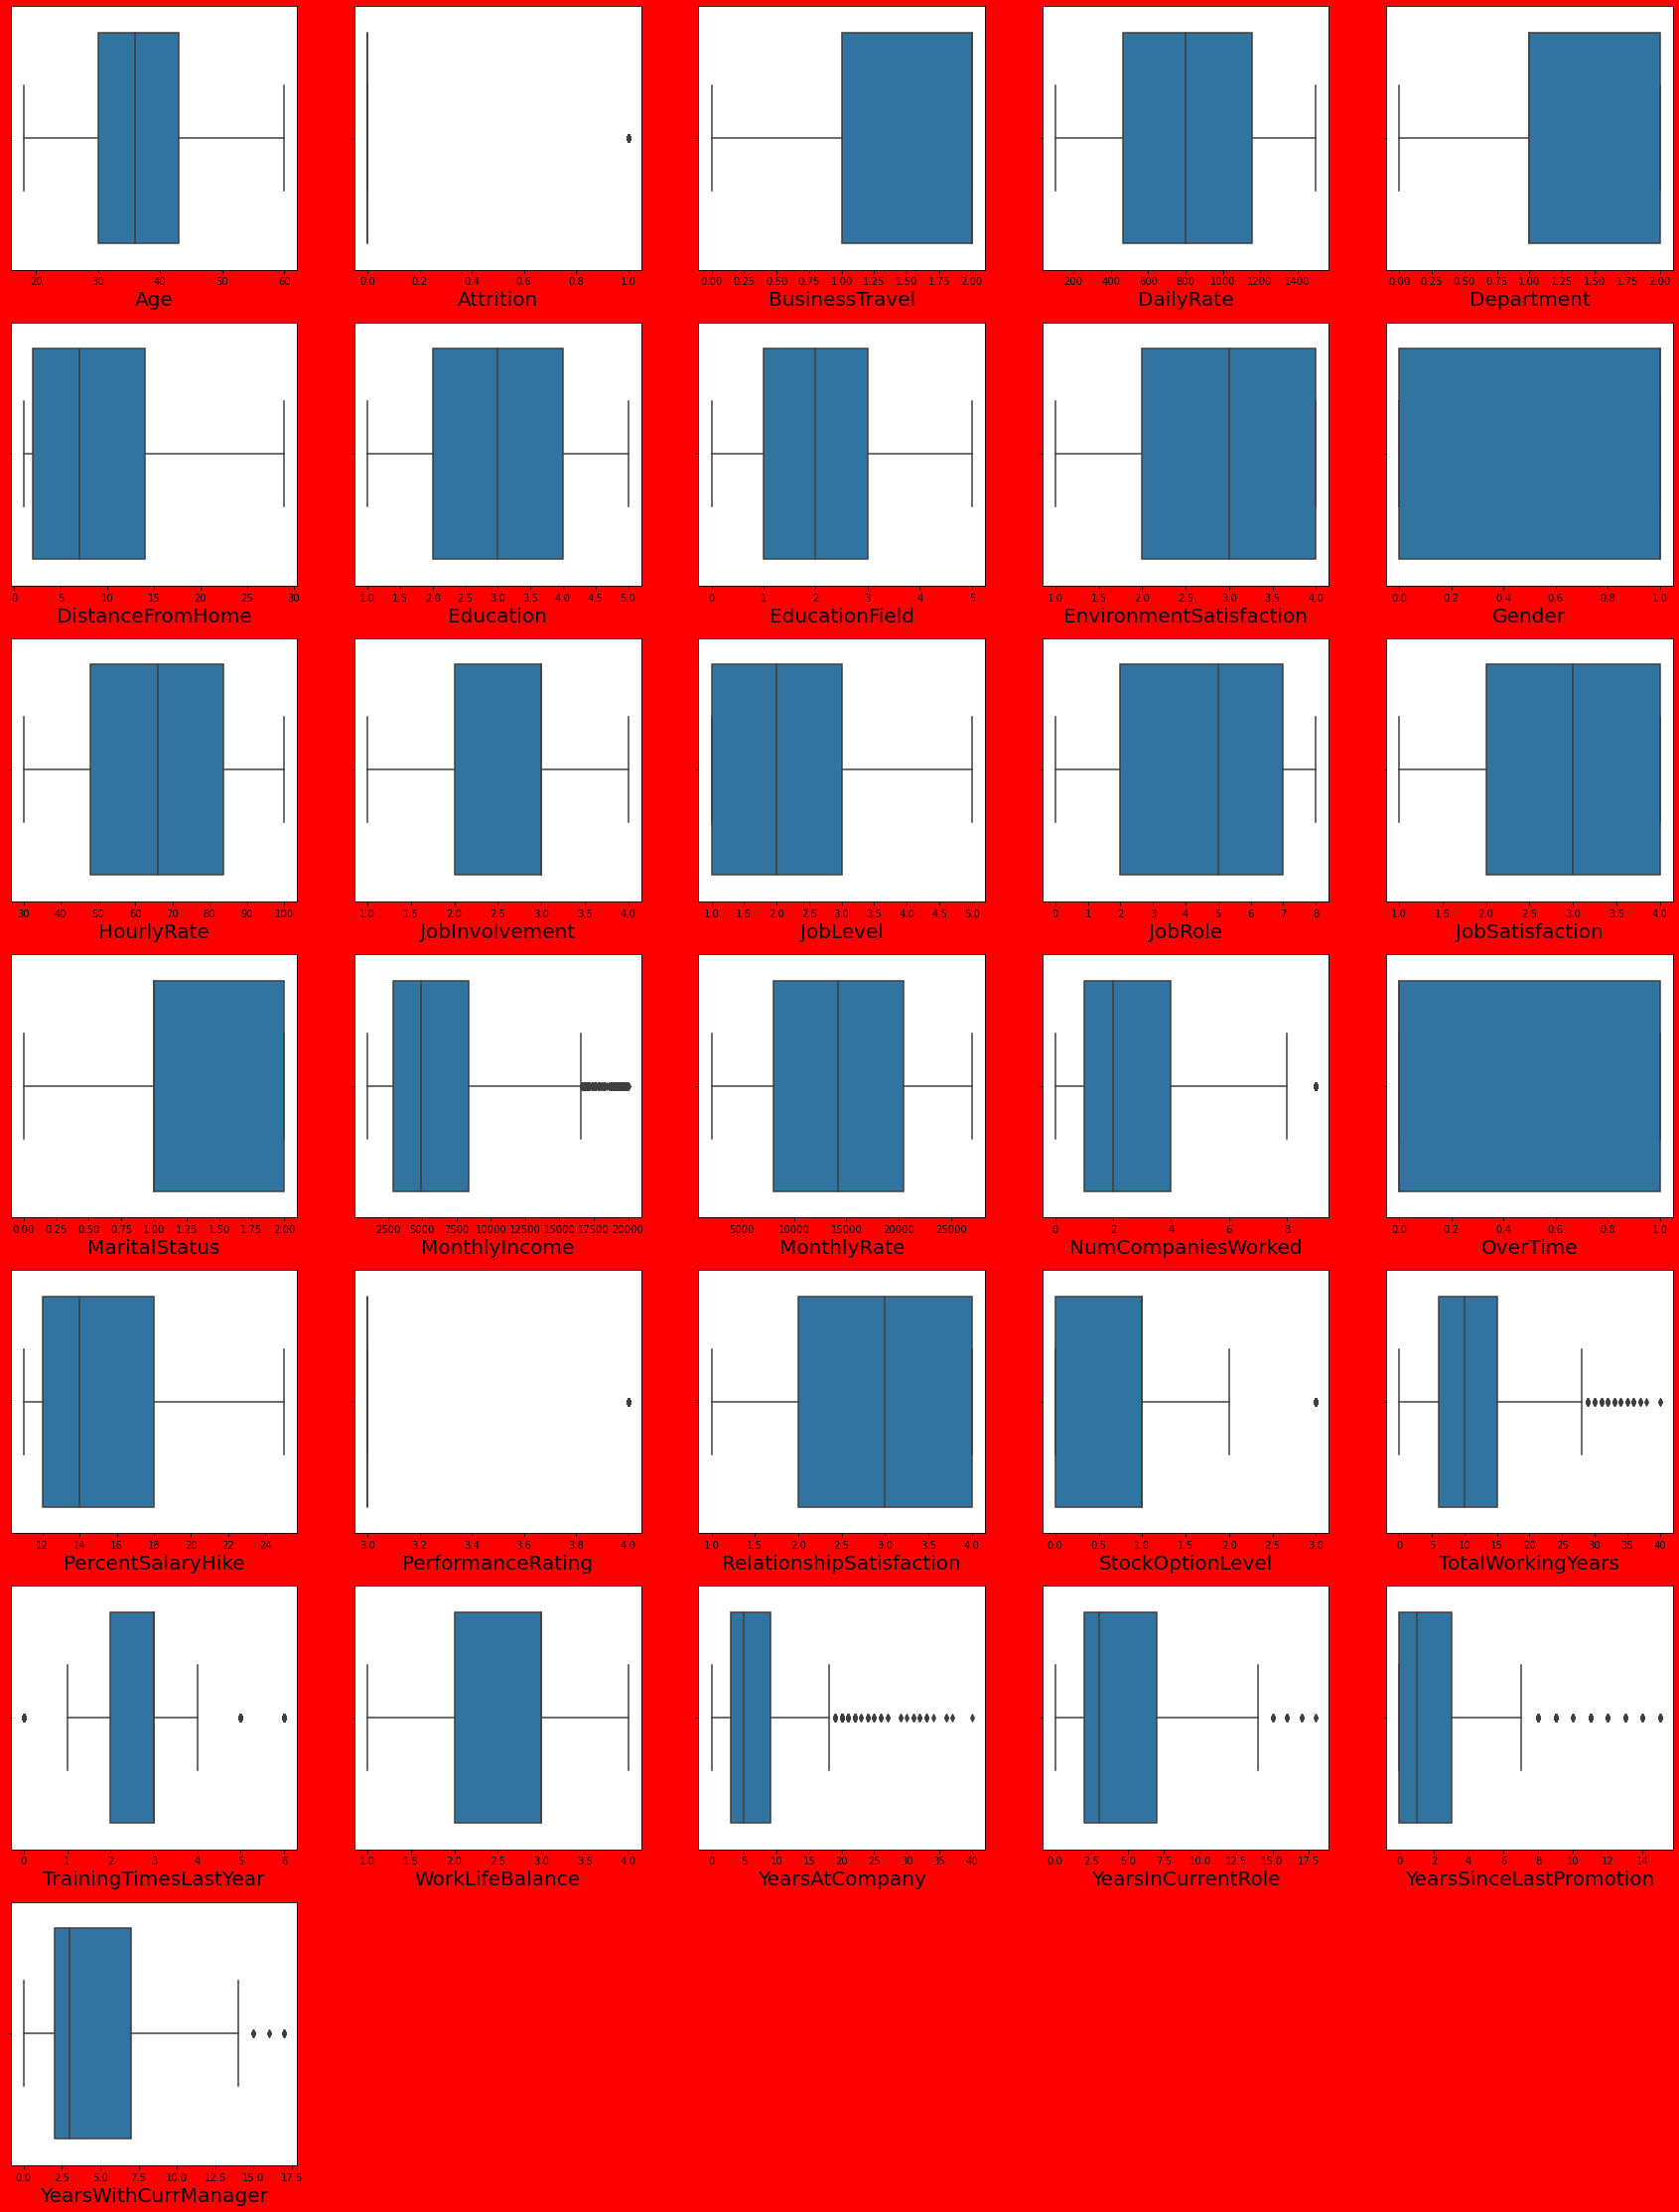

In [79]:
plt.figure(figsize=(30,40) , facecolor = 'red')
graph = 1

for column in data:
    
    if graph <= 35:
        plt.subplot (7,5,graph)
        ax = sns.boxplot(data[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

### From the box plot we can see that Some feature has outliers.

### Treating the outliers by Zscore


In [80]:
# we will go with 3 std
# from scipy import stats

from scipy.stats import zscore

In [82]:
# new code for deleting outlier here we take std = 3
z_score = zscore(data)
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.5 ).all(axis=1)

data = data[filtering_entry]

data.describe()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,...,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.00000,1172.000000,1172.000000,1172.000000,1172.000000
mean,35.542662,0.171502,1.606655,798.330205,1.273891,9.360922,2.875427,2.264505,2.724403,0.603242,...,3.148464,2.691980,0.659556,9.400171,2.801195,2.75256,5.759386,3.738055,1.649317,3.678328
std,8.565061,0.377108,0.661022,403.039031,0.530119,8.139703,1.020629,1.350587,1.091064,0.489434,...,0.355711,1.086288,0.687303,5.775424,1.309063,0.71476,4.102669,3.088031,2.295592,3.137026
min,18.000000,0.000000,0.000000,103.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.000000,464.750000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.00000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,0.000000,2.000000,801.500000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,9.000000,3.000000,3.00000,5.000000,3.000000,1.000000,3.000000
75%,41.000000,0.000000,2.000000,1147.750000,2.000000,14.250000,4.000000,3.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,12.000000,3.000000,3.00000,8.000000,7.000000,2.000000,7.000000
max,59.000000,1.000000,2.000000,1498.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,2.000000,30.000000,6.000000,4.00000,22.000000,13.000000,10.000000,13.000000


In [83]:
print('percentage of loss of data by zscore is :',(df1.shape[0]-data.shape[0])/data.shape[0])

percentage of loss of data by zscore is : 0.25426621160409557


#### After treating the outliers we lost around 25% of data

In [85]:
data.shape

(1172, 31)

##### Again Plotting Disrtibution plot to see how data is distributed after treating the outliers.

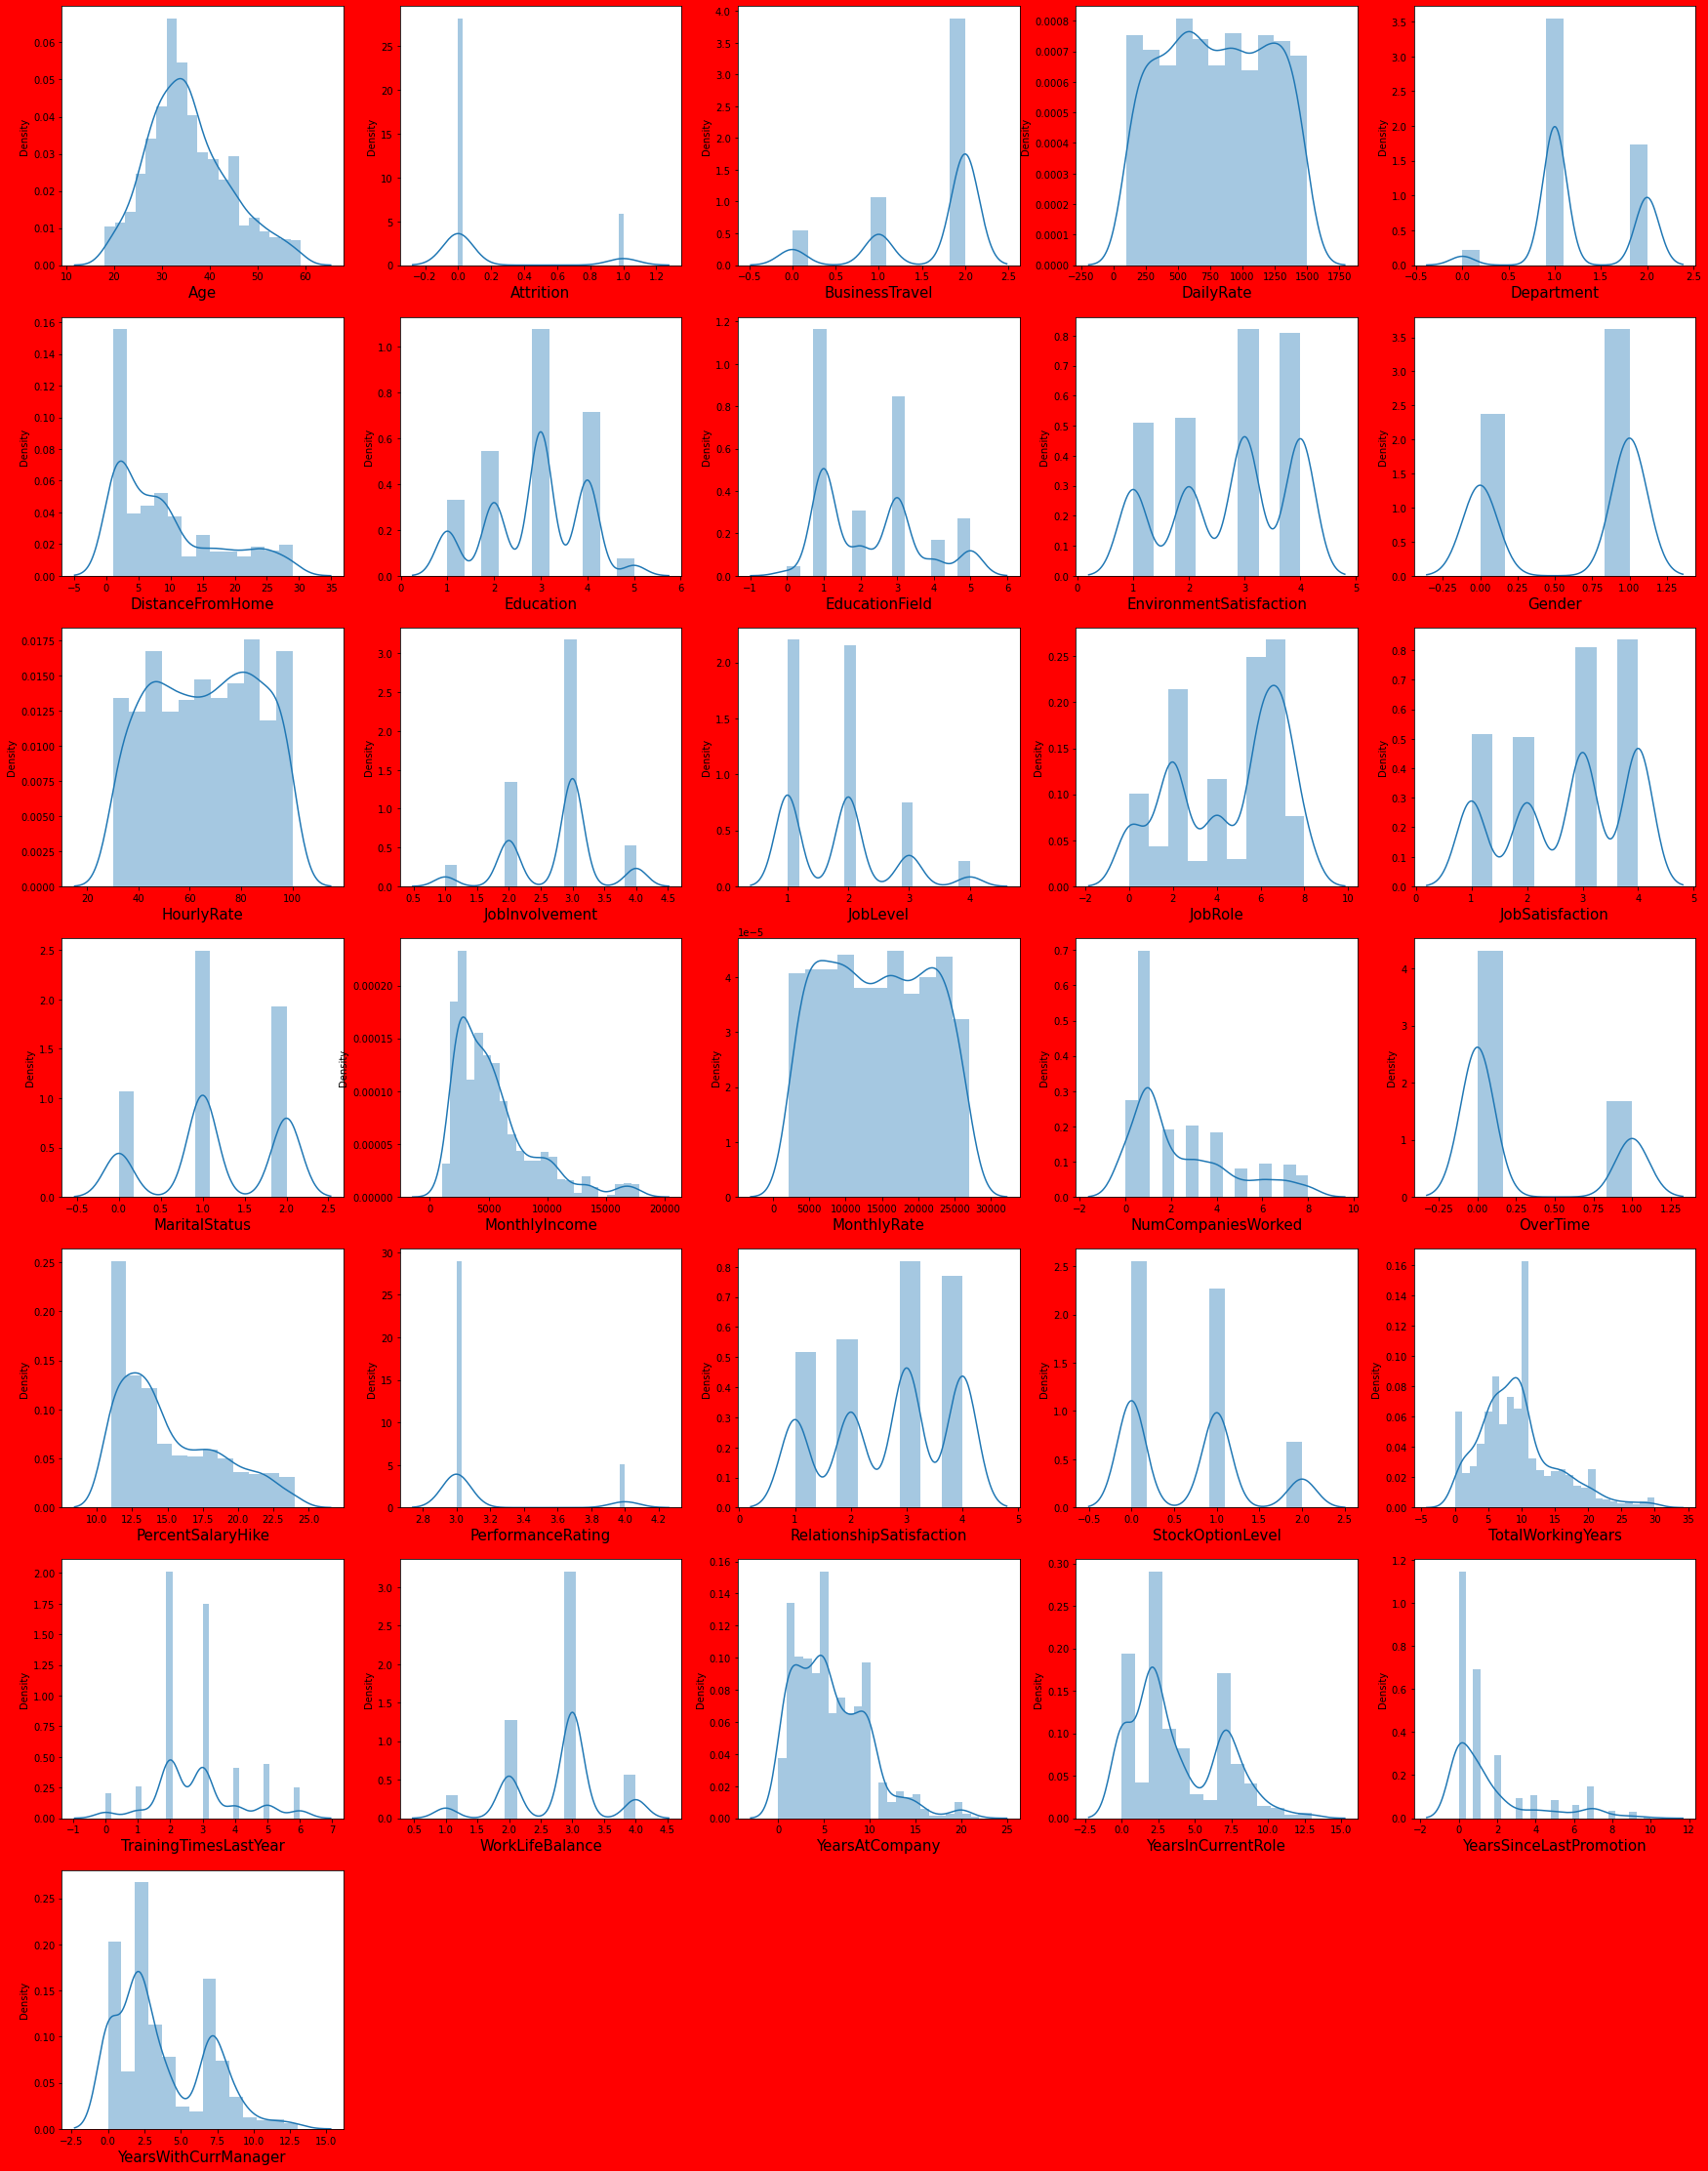

In [86]:
# seeeing dist plot how data is scttered
plt.figure(figsize=(30,40) , facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <= 35:
        ax = plt.subplot(7,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column , fontsize = 15)
    plotnumber += 1
plt.show()


### Plotting Heatmap to see co-relation

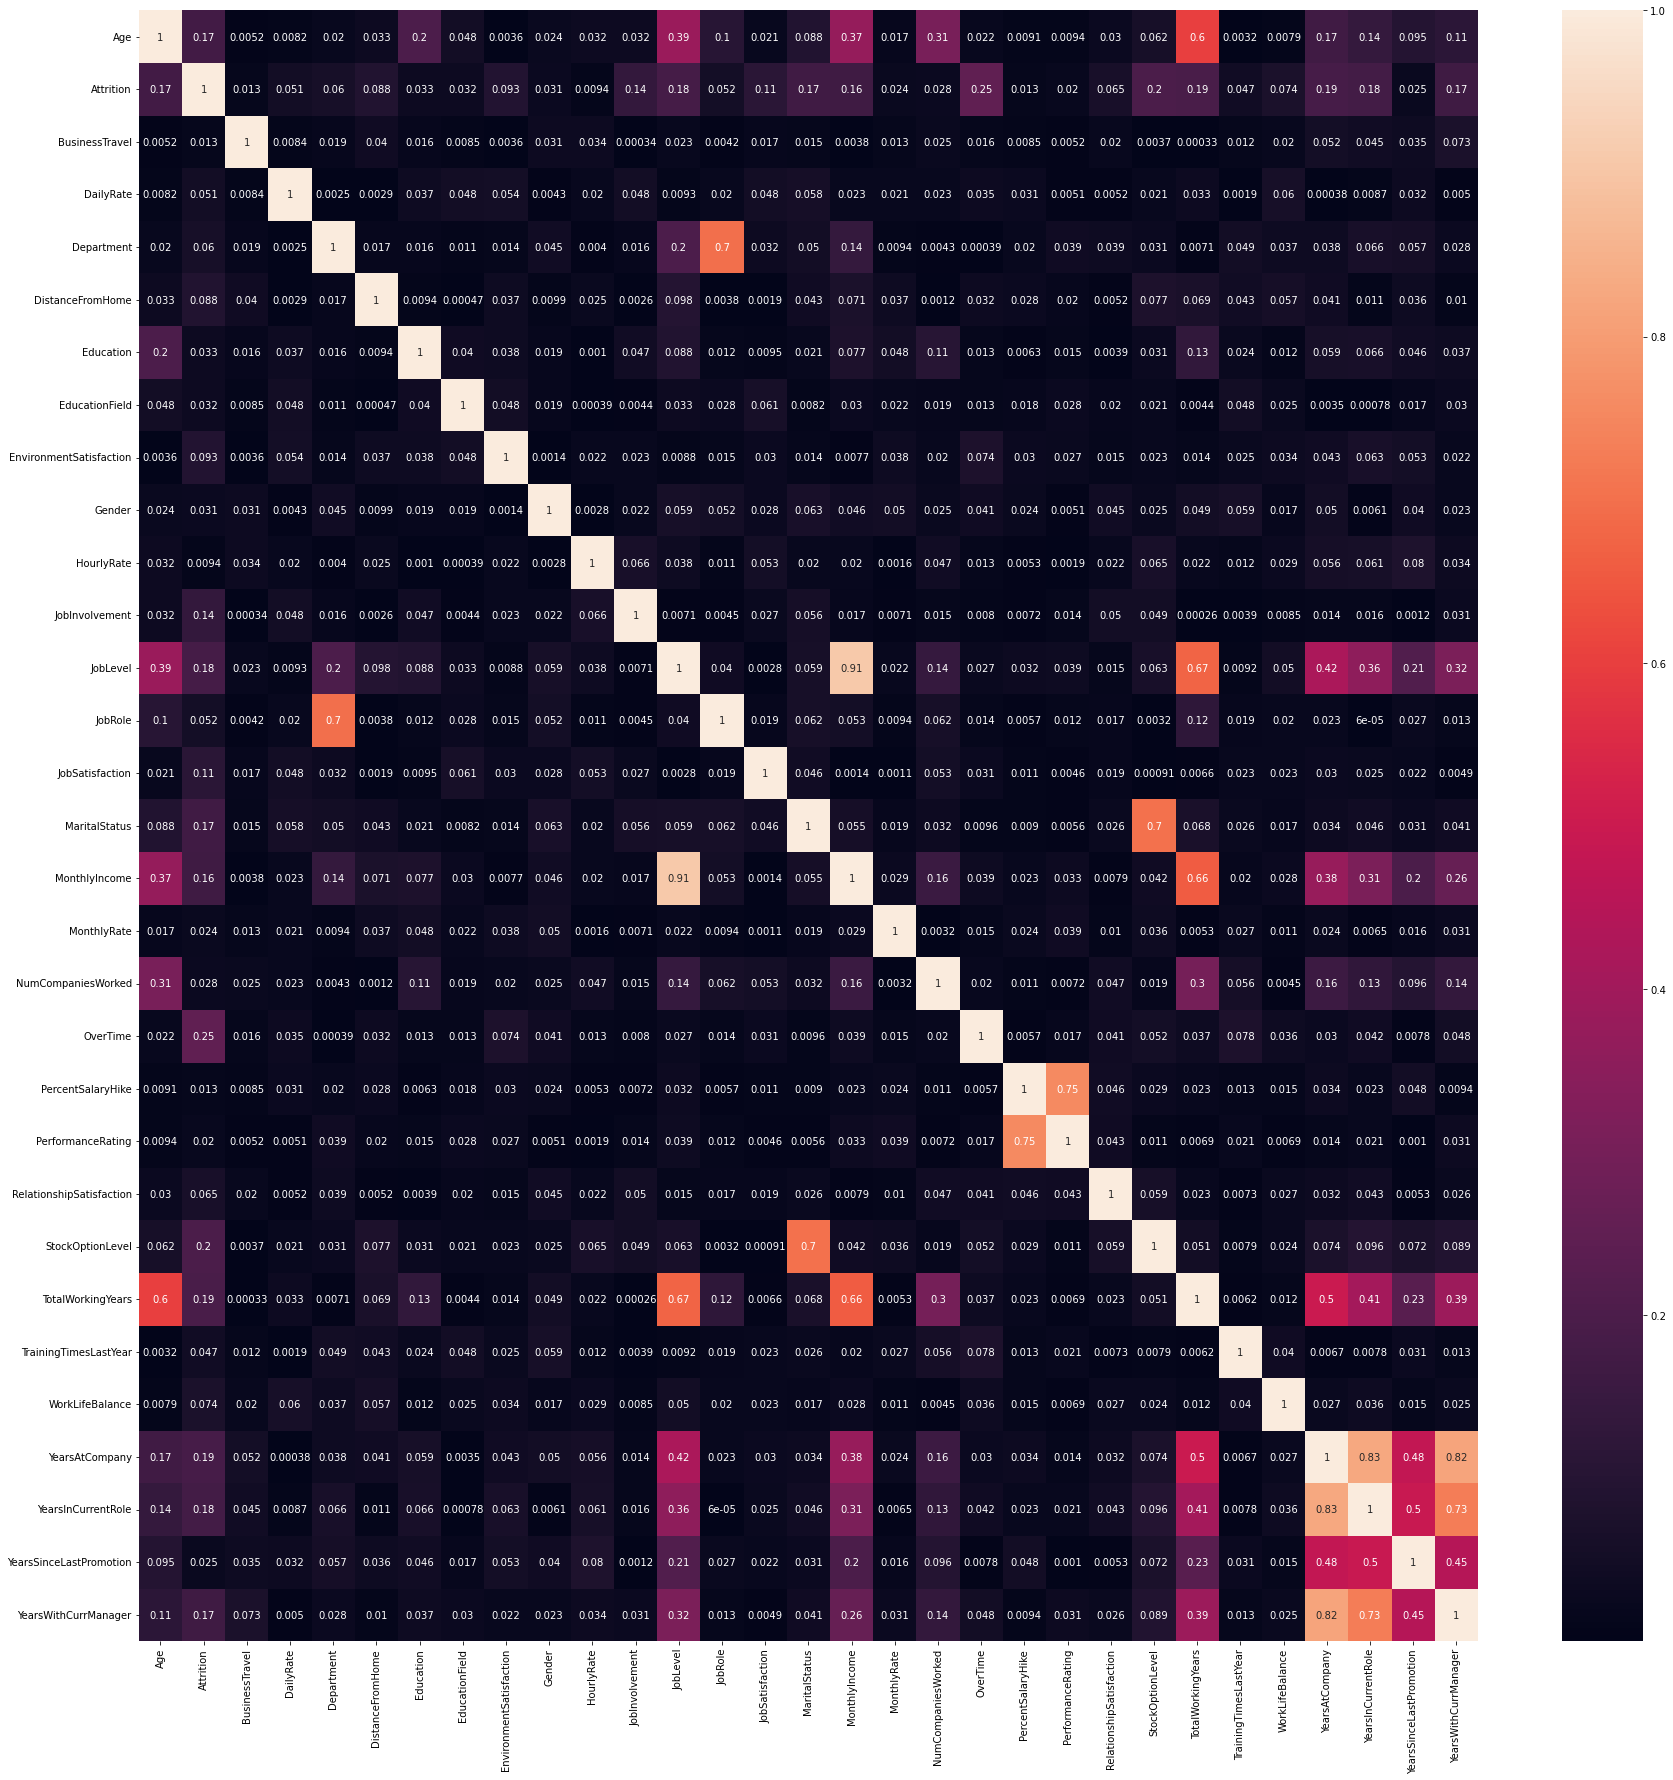

In [89]:
# find relationship between feature vs feature and feature vs label by using new technique that is heatmap

# we can use heatmap to see that problem has multicollinearity problem exist or not

data_corr = data.corr().abs() #this code will give coefficient of one variable vs all other feature (relationship will all)

plt.figure(figsize=(30,30))
sns.heatmap (data_corr , annot = True , annot_kws={'size' : 10}) # df_corr = graph , annot=number inside box , annot_kws=size of number inside box
plt.show()

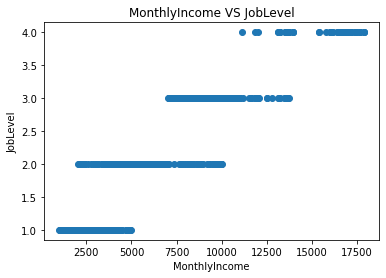

In [90]:
# here im suspecting on ap_hi and ap_lo
# so checking using scatter plot

plt.scatter(data.MonthlyIncome , data.JobLevel)
plt.xlabel('MonthlyIncome')
plt.ylabel('JobLevel')
plt.title('MonthlyIncome VS JobLevel')
plt.show()

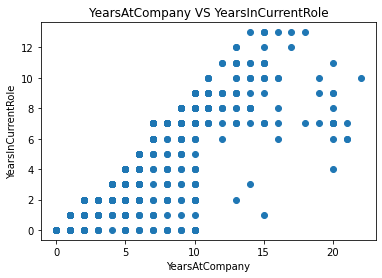

In [91]:
# here im suspecting on ap_hi and ap_lo
# so checking using scatter plot

plt.scatter(data.YearsAtCompany , data.YearsInCurrentRole)
plt.xlabel('YearsAtCompany')
plt.ylabel('YearsInCurrentRole')
plt.title('YearsAtCompany VS YearsInCurrentRole')
plt.show()

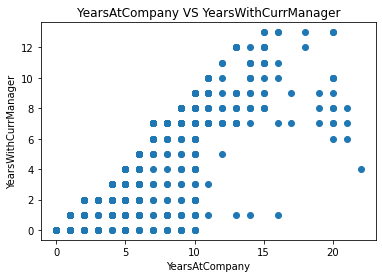

In [92]:
# here im suspecting on ap_hi and ap_lo
# so checking using scatter plot

plt.scatter(data.YearsAtCompany , data.YearsWithCurrManager)
plt.xlabel('YearsAtCompany')
plt.ylabel('YearsWithCurrManager')
plt.title('YearsAtCompany VS YearsWithCurrManager')
plt.show()

From the heatmap, MonthlyIncome , JobLevel , YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager are highly co-related and we again plot a scratted plot to see any co-relation and we found that they are co-related.

In [93]:
# Removing Highly co-related feature vs feature because if we keep our model will learn same thinf and become overfitted model.
data.drop(['MonthlyIncome' , 'YearsInCurrentRole','YearsWithCurrManager'],axis=1,inplace = True)

In [94]:
#Splitting the data
X = data.drop(['Attrition'],axis = 1)
y = data['Attrition']

In [96]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler

# Scale our data using StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)


### Checking for the multicollinearity Using VIF

In [97]:
# now we check for multicolinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()  #creating empty dataframe

vif['vif']=[variance_inflation_factor(X_scaled , i) for i in range(X_scaled.shape[1])]  


# for above code first it will execute for statement and shape[1] give all columns and store in i then it will pass to vif 
##  in that we already have X_scaled so it will compare feature vs feature

vif['features']=X.columns  # seperate column for column features

vif

,vif,features
0,1.709273,Age
1,1.011509,BusinessTravel
2,1.029535,DailyRate
3,2.247159,Department
4,1.029217,DistanceFromHome
5,1.059565,Education
6,1.022980,EducationField
7,1.032200,EnvironmentSatisfaction
8,1.028230,Gender
9,1.030143,HourlyRate


### LogisticRegression Model

In [98]:
#import necessary library
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [99]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    
    y_pred=lr.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.8361774744027304 RandomState 1


MAXINING TESTING SCORE 0.8361774744027304 ON RANDOM STATE OF 1
Testing Accuracy 0.8191126279863481 RandomState 2


Testing Accuracy 0.8293515358361775 RandomState 3


Testing Accuracy 0.8395904436860068 RandomState 4


MAXINING TESTING SCORE 0.8395904436860068 ON RANDOM STATE OF 4
Testing Accuracy 0.8088737201365188 RandomState 5


Testing Accuracy 0.7781569965870307 RandomState 6


Testing Accuracy 0.8703071672354948 RandomState 7


MAXINING TESTING SCORE 0.8703071672354948 ON RANDOM STATE OF 7
Testing Accuracy 0.7952218430034129 RandomState 8


Testing Accuracy 0.8293515358361775 RandomState 9


Testing Accuracy 0.8020477815699659 RandomState 10


Testing Accuracy 0.8293515358361775 RandomState 11


Testing Accuracy 0.8430034129692833 RandomState 12


Testing Accuracy 0.8156996587030717 RandomState 13


Testing Accuracy 0.8293515358361775 RandomState 14


Testing Accuracy 0.8020477815699659 RandomState 15


Testing Accuracy 0.781569

In [ ]:
#### Model Scores
Training Score = 82.707622%
Testing Score = 88.395904%

In [100]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=18)

In [101]:
 #write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [102]:
# model initilization
clf_lr = LogisticRegression()
clf_lr.fit(X_train,y_train)

LogisticRegression()

In [103]:
# call the function
metric_score (clf_lr,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_lr,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 81.797497%
====Testing Score====
Accuracy score : 88.054608%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.89      0.99      0.94       256
           1       0.62      0.14      0.22        37

    accuracy                           0.88       293
   macro avg       0.76      0.56      0.58       293
weighted avg       0.85      0.88      0.85       293



#### Model Scores
Training Score = 81.797497%


Testing Score = 88.054608%

### Hyperparameter For Logistic Regression

In [104]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [105]:
print (grid_result.best_params_)


{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [106]:
# update our model and train again for new score 

clf_lr=LogisticRegression(C=100,penalty='none',solver='newton-cg')
clf_lr.fit(X_train,y_train)

LogisticRegression(C=100, penalty='none', solver='newton-cg')

In [107]:
# call the function
metric_score (clf_lr,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_lr,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 87.258248%
====Testing Score====
Accuracy score : 87.030717%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.91      0.94      0.93       256
           1       0.48      0.38      0.42        37

    accuracy                           0.87       293
   macro avg       0.70      0.66      0.68       293
weighted avg       0.86      0.87      0.86       293



### Model Scores With Hyperparameter Tuning
Training Score = 87.258248%

Testing Score =  87.030717%

### Confusion Matrix Logistic regression

In [109]:
### if you want to check confusion matrix

y_pred=clf_lr.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[241,  15],
       [ 23,  14]], dtype=int64)

### DecisionTreeClassifier Model

In [110]:
#import necessary librarys
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier #if regression then regressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Finding the best Random State

In [111]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)

    pred=dt.predict(X_train)
    accuracy=accuracy_score(y_train,pred)
    print ('Training Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    y_pred=dt.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Training Accuracy 1.0 RandomState 1


Testing Accuracy 0.7713310580204779 RandomState 1


MAXINING TESTING SCORE 0.7713310580204779 ON RANDOM STATE OF 1
Training Accuracy 1.0 RandomState 2


Testing Accuracy 0.7508532423208191 RandomState 2


Training Accuracy 1.0 RandomState 3


Testing Accuracy 0.7372013651877133 RandomState 3


Training Accuracy 1.0 RandomState 4


Testing Accuracy 0.7849829351535836 RandomState 4


MAXINING TESTING SCORE 0.7849829351535836 ON RANDOM STATE OF 4
Training Accuracy 1.0 RandomState 5


Testing Accuracy 0.7508532423208191 RandomState 5


Training Accuracy 1.0 RandomState 6


Testing Accuracy 0.7372013651877133 RandomState 6


Training Accuracy 1.0 RandomState 7


Testing Accuracy 0.7679180887372014 RandomState 7


Training Accuracy 1.0 RandomState 8


Testing Accuracy 0.726962457337884 RandomState 8


Training Accuracy 1.0 RandomState 9


Testing Accuracy 0.7986348122866894 RandomState 9


MAXINING TESTING SCORE 0.7986348122866894 ON RANDOM STATE OF 9
Tr

Training Accuracy 1.0 RandomState 93


Testing Accuracy 0.7372013651877133 RandomState 93


Training Accuracy 1.0 RandomState 94


Testing Accuracy 0.7610921501706485 RandomState 94


Training Accuracy 1.0 RandomState 95


Testing Accuracy 0.7679180887372014 RandomState 95


Training Accuracy 1.0 RandomState 96


Testing Accuracy 0.764505119453925 RandomState 96


Training Accuracy 1.0 RandomState 97


Testing Accuracy 0.7713310580204779 RandomState 97


Training Accuracy 1.0 RandomState 98


Testing Accuracy 0.7781569965870307 RandomState 98


Training Accuracy 1.0 RandomState 99


Testing Accuracy 0.7508532423208191 RandomState 99




In [112]:
print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 0.8191126279863481 ON RANDOM STATE OF 53


### Training the model

In [113]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=53)

In [114]:
#write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [115]:
# model initilization
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [116]:
# call the function
metric_score (clf_dt,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_dt,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 81.228669%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.92      0.86      0.89       256
           1       0.34      0.51      0.41        37

    accuracy                           0.81       293
   macro avg       0.63      0.68      0.65       293
weighted avg       0.85      0.81      0.83       293



# Model Scores
Training Score = 100.000000%

Testing Score = 81.228669%

# Hyperparameter For Decision Tree

In [117]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
grid_param = {
                'criterion':['gini','entropy'],
                'max_depth':range(1,30),
                'min_samples_leaf':range(1,5),
                'min_samples_split':range(5,10),
                'max_leaf_nodes':range(1,10)
}

In [118]:
# here we are define some parameter and ask gridsearchcv which one is best
grid_search = GridSearchCV (estimator = clf_dt,param_grid=grid_param,cv=5,n_jobs=-1)

In [119]:

#pass dataset to train 
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30),
                         'max_leaf_nodes': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(5, 10)})

In [120]:
# see best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [121]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 2, min_samples_leaf= 4, min_samples_split= 5)
clf_dt.fit(X_train,y_train)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, min_samples_split=5)

In [122]:
# call the function
metric_score (clf_dt,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_dt,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 82.138794%
====Testing Score====
Accuracy score : 86.689420%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.91      0.94      0.93       256
           1       0.46      0.35      0.40        37

    accuracy                           0.87       293
   macro avg       0.69      0.65      0.66       293
weighted avg       0.85      0.87      0.86       293



#### Model Scores With Hyperparameter Tuning
Training Score = 82.138794%

Testing Score = 86.689420%

#### Confusion Matrix Decision tree

In [123]:
### if you want to check confusion matrix

y_pred=clf_dt.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[241,  15],
       [ 24,  13]], dtype=int64)

# RandomForestClassifier Model

In [124]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier #RandomForestRegressor if regression problem
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [125]:
#Finding best random State

#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.856655290102389 RandomState 1


MAXINING TESTING SCORE 0.856655290102389 ON RANDOM STATE OF 1
Testing Accuracy 0.8191126279863481 RandomState 2


Testing Accuracy 0.8191126279863481 RandomState 3


Testing Accuracy 0.8430034129692833 RandomState 4


Testing Accuracy 0.8395904436860068 RandomState 5


Testing Accuracy 0.7952218430034129 RandomState 6


Testing Accuracy 0.8839590443686007 RandomState 7


MAXINING TESTING SCORE 0.8839590443686007 ON RANDOM STATE OF 7
Testing Accuracy 0.8191126279863481 RandomState 8


Testing Accuracy 0.8430034129692833 RandomState 9


Testing Accuracy 0.8088737201365188 RandomState 10


Testing Accuracy 0.8225255972696246 RandomState 11


Testing Accuracy 0.8532423208191127 RandomState 12


Testing Accuracy 0.8225255972696246 RandomState 13


Testing Accuracy 0.8464163822525598 RandomState 14


Testing Accuracy 0.825938566552901 RandomState 15


Testing Accuracy 0.7815699658703071 RandomState 16


Testing Accuracy 0.8805460750853242 Ra

In [126]:
print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 0.8976109215017065 ON RANDOM STATE OF 53


In [127]:

#Training the model
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=53)

In [128]:
#write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,pred,digits=2))

In [129]:
# model initilization
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)

RandomForestClassifier()

In [130]:
# call the function
metric_score (clf_rf,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_rf,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 100.000000%
====Testing Score====
Accuracy score : 88.737201%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.89      0.99      0.94       256
           1       0.70      0.19      0.30        37

    accuracy                           0.89       293
   macro avg       0.80      0.59      0.62       293
weighted avg       0.87      0.89      0.86       293



### Hyperparameter Tuning for Random Forest

In [131]:
# we are tuning 4 important hyperparameter rightnow we are passing the different value for both parameter
params_grid = {'n_estimators' : range(1,5),
               'criterion' : ['entropy' , 'gini'],
               'max_depth' : range(1,30),
               'min_samples_split' :range(5,10),
               'min_samples_leaf':range(1,10)}

In [132]:
# here we are define some parameter and ask gridsearchcv which one is best
grd = GridSearchCV(clf_rf,param_grid = params_grid)

In [133]:
#pass dataset to train 
grd.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(5, 10),
                         'n_estimators': range(1, 5)})

In [134]:
print ('Best parameters : ' , grd.best_params_) #printing best parameters

Best parameters :  {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 4}


In [135]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'gini', max_depth = 15, min_samples_leaf= 5, min_samples_split= 5,n_estimators= 50)
rf.fit(X_train,y_train)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=50)

In [136]:
# call the function
metric_score (rf,X_train,X_test,y_train,y_test,train = True)
metric_score (rf,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 90.102389%
====Testing Score====
Accuracy score : 89.761092%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.90      0.99      0.94       256
           1       0.82      0.24      0.38        37

    accuracy                           0.90       293
   macro avg       0.86      0.62      0.66       293
weighted avg       0.89      0.90      0.87       293



#### Model Scores With Hyperparameter Tuning
Training Score = 89.078498%

Testing Score = 88.737201%


# Confusion Matrix 

In [137]:
### if you want to check confusion matrix

y_pred=rf.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[254,   2],
       [ 28,   9]], dtype=int64)

## KNeighborsClassifier Model


In [138]:
#import necessary library

import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [139]:
#Finding the Best Random State
MaxAccu=0
MaxRS=0

for i in range (1,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(X_train,y_train)
    
    y_pred=rf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print ('Testing Accuracy' , accuracy , 'RandomState' ,i)
    print('\n')
    
    
    if accuracy>MaxAccu:
        MaxAccu=accuracy
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , i)

Testing Accuracy 0.9215017064846417 RandomState 1


MAXINING TESTING SCORE 0.9215017064846417 ON RANDOM STATE OF 1
Testing Accuracy 0.8771331058020477 RandomState 2


Testing Accuracy 0.8907849829351536 RandomState 3


Testing Accuracy 0.89419795221843 RandomState 4


Testing Accuracy 0.8873720136518771 RandomState 5


Testing Accuracy 0.8532423208191127 RandomState 6


Testing Accuracy 0.9283276450511946 RandomState 7


MAXINING TESTING SCORE 0.9283276450511946 ON RANDOM STATE OF 7
Testing Accuracy 0.9044368600682594 RandomState 8


Testing Accuracy 0.9112627986348123 RandomState 9


Testing Accuracy 0.8839590443686007 RandomState 10


Testing Accuracy 0.8873720136518771 RandomState 11


Testing Accuracy 0.8976109215017065 RandomState 12


Testing Accuracy 0.8907849829351536 RandomState 13


Testing Accuracy 0.89419795221843 RandomState 14


Testing Accuracy 0.8839590443686007 RandomState 15


Testing Accuracy 0.8464163822525598 RandomState 16


Testing Accuracy 0.9112627986348123 Ran

In [140]:
print('MAXINING TESTING SCORE' , MaxAccu , 'ON RANDOM STATE OF' , MaxRS)

MAXINING TESTING SCORE 0.9385665529010239 ON RANDOM STATE OF 56


In [141]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=7)

In [142]:
#write one function and call as many time as you want
def metric_score (clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        pred = clf.predict(X_train)
        print ('====Training Score====')
        print (f"Accuracy score : {accuracy_score(y_train,pred)*100:2f}%")
        
    elif train==False:
        y_pred = clf.predict(X_test)
        print ('====Testing Score====')
        print (f"Accuracy score : {accuracy_score(y_test,y_pred)*100:2f}%")
        
        print ('\n \n Classification report \n ' , classification_report(y_test,y_pred,digits=2))

In [143]:
# model initilization
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [144]:
# call the function
metric_score (clf_knn,X_train,X_test,y_train,y_test,train = True)
metric_score (clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 83.959044%
====Testing Score====
Accuracy score : 84.641638%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.88      0.96      0.92       255
           1       0.23      0.08      0.12        38

    accuracy                           0.85       293
   macro avg       0.55      0.52      0.52       293
weighted avg       0.79      0.85      0.81       293



### Model Scores
Training Score = 83.959044%

Testing Score = 84.641638%

### Hyperparameter Tuning for KNNeighbors Classifier

In [145]:
from sklearn.model_selection import GridSearchCV
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]}

In [146]:
# now call grid search and say that we are going to use knn model

gridsearch=GridSearchCV(estimator=clf_knn , param_grid=param_grid)

In [147]:
#give the data to object
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [148]:
#see the best paramater
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [149]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 13)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [150]:
metric_score(clf_knn,X_train,X_test,y_train,y_test,train=True)

metric_score(clf_knn,X_train,X_test,y_train,y_test,train=False)

====Training Score====
Accuracy score : 81.342435%
====Testing Score====
Accuracy score : 86.348123%

 
 Classification report 
                precision    recall  f1-score   support

           0       0.87      0.99      0.93       255
           1       0.25      0.03      0.05        38

    accuracy                           0.86       293
   macro avg       0.56      0.51      0.49       293
weighted avg       0.79      0.86      0.81       293



### Model Scores With Hyperparameter Tuning
Training Score = 81.342435%

Testing Score = 86.348123%

### Confusion Matric for KNN

In [151]:
### if you want to check confusion matrix

y_pred=clf_knn.predict(X_test)
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[252,   3],
       [ 37,   1]], dtype=int64)

# Plot AUC-ROC curve for above 4-Models

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [153]:
clf_dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
clf_knn=KNeighborsClassifier()
clf_lr=LogisticRegression()


### Training the data

In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=53)

### AUC-ROC Curve is on hyperparameter model

In [155]:
# we will use the best parameter in our knn algorithm and check if accuracy is increase or not
clf_knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 3, n_neighbors = 13)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [156]:
#initiate what new parameter we got
rf=RandomForestClassifier(criterion= 'gini', max_depth = 15, min_samples_leaf= 5, min_samples_split= 5,n_estimators= 50)
rf.fit(X_train,y_train)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=50)

In [157]:
#initiate what new parameter we got

clf_dt=DecisionTreeClassifier(criterion= 'gini', max_depth = 2, min_samples_leaf= 4, min_samples_split= 5)
clf_dt.fit(X_train,y_train)

#i tried different combination and i find this is best parameter so using this instead of gridsearch parameters

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, min_samples_split=5)

In [158]:
# update our model and train again for new score 

clf_lr=LogisticRegression(C=100,penalty='none',solver='newton-cg')
clf_lr.fit(X_train,y_train)

LogisticRegression(C=100, penalty='none', solver='newton-cg')

In [159]:
clf_dt.score(X_train,y_train)
rf.score(X_train,y_train)
clf_lr.score(X_train,y_train)
clf_knn.score(X_train,y_train)
print('All model are trained')

All model are trained
